# Logistic Regression 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('Iris.csv', low_memory=False)

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Describing the Dataset

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Plotting using Seaborn

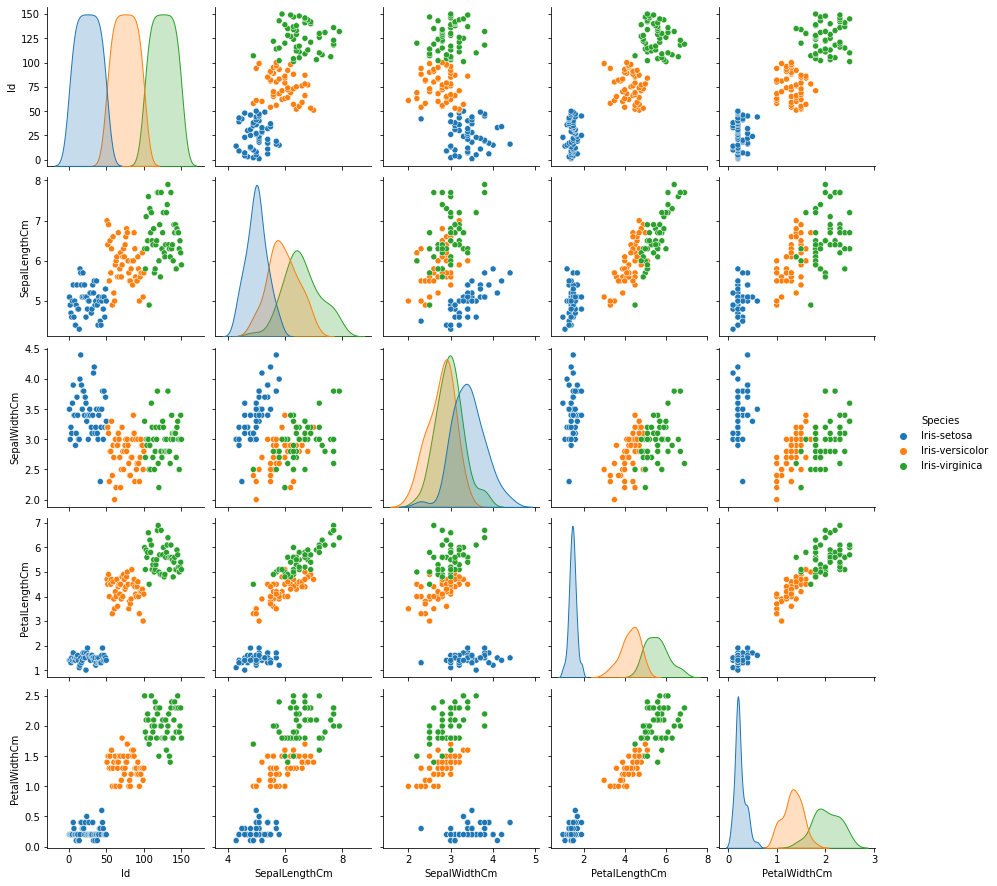

In [ ]:
sns.pairplot(df, hue='Species', height=2.5)

In [ ]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Simple Logistic Regression

In [ ]:
final_df = df[df['Species'] != 'Iris-versicolor']
#final_df = df[df['Species'] != 'Iris-virginica']

In [ ]:
final_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
final_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
final_df = final_df.drop(final_df.columns[[0]], axis = 1)
final_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Checking For Outliers

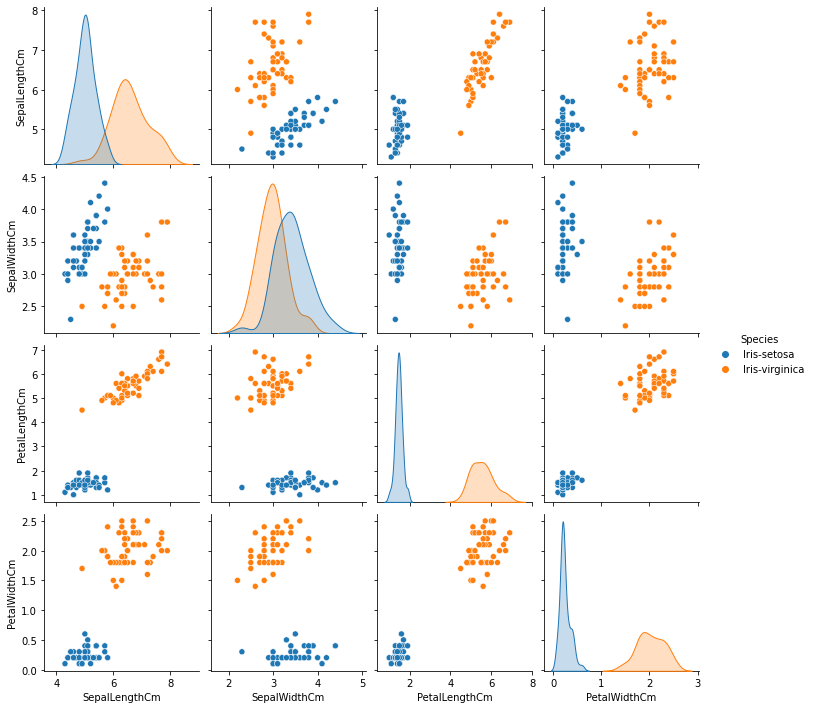

In [ ]:
sns.pairplot(final_df, hue='Species', height=2.5)

### Removing Outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c1bd95d30>]],
      dtype=object)

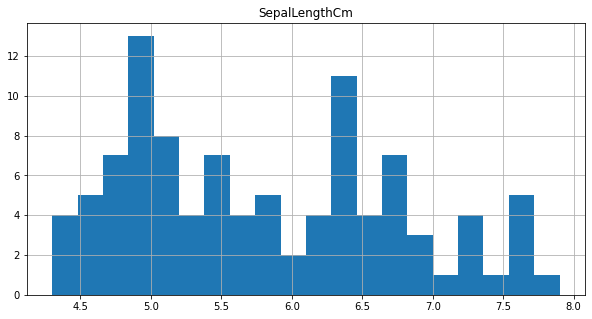

In [ ]:
final_df.hist(column = 'SepalLengthCm',bins=20, figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c1914f550>]],
      dtype=object)

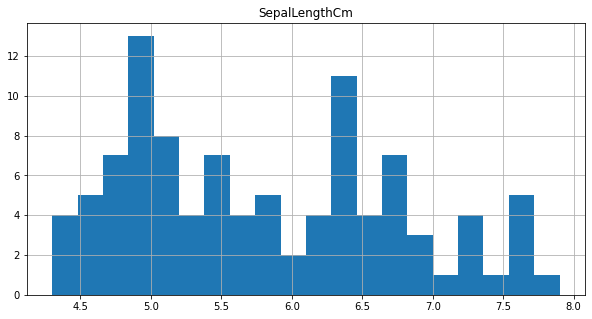

In [ ]:
final_df.loc[final_df.SepalLengthCm < 1, ['SepalLengthCm']] = final_df['SepalLengthCm']*100
final_df.hist(column = 'SepalLengthCm',bins=20, figsize=(10,5))

In [ ]:
final_df = final_df.drop(final_df[(final_df['Species'] == "Iris-setosa") & (final_df['SepalWidthCm'] < 2.5)].index)

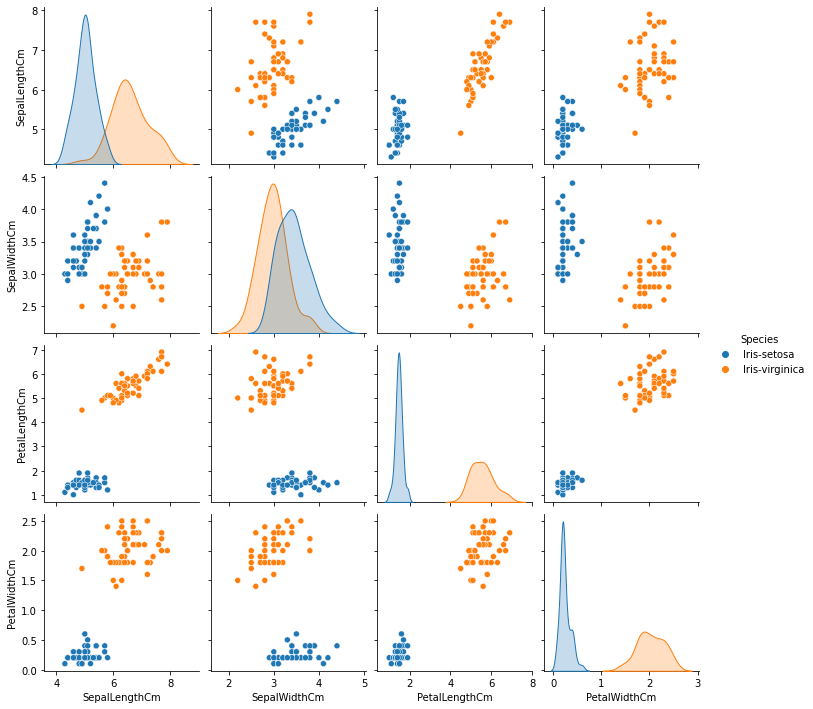

In [ ]:
sns.pairplot(final_df, hue='Species', height=2.5)

### Model Construction

In [ ]:
#final_df['Species'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)
final_df['Species'].replace(["Iris-setosa","Iris-virginica"], [1,0], inplace=True)
final_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#### Dividing the database into the testing and training datasets

In [ ]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
#
inp_df = inp_df.astype(float)
#out_df = out_df.astype(float)
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [ ]:
inp_df

array([[-0.7584958 ,  0.72628277, -1.02304367, -1.03071549],
       [-0.9721262 , -0.50491576, -1.02304367, -1.03071549],
       [-1.1857566 , -0.01243635, -1.07106706, -1.03071549],
       [-1.29257179, -0.25867606, -0.97502028, -1.03071549],
       [-0.865311  ,  0.97252248, -1.02304367, -1.03071549],
       [-0.43805021,  1.7112416 , -0.87897351, -0.81221263],
       [-1.29257179,  0.48004307, -1.02304367, -0.92146406],
       [-0.865311  ,  0.48004307, -0.97502028, -1.03071549],
       [-1.50620219, -0.75115547, -1.02304367, -1.03071549],
       [-0.9721262 , -0.25867606, -0.97502028, -1.13996691],
       [-0.43805021,  1.21876219, -0.97502028, -1.03071549],
       [-1.0789414 ,  0.48004307, -0.9269969 , -1.03071549],
       [-1.0789414 , -0.50491576, -1.02304367, -1.13996691],
       [-1.61301739, -0.50491576, -1.16711383, -1.13996691],
       [-0.01078941,  1.95748131, -1.11909045, -1.03071549],
       [-0.11760461,  2.94244014, -0.97502028, -0.81221263],
       [-0.43805021,  1.

In [ ]:
out_df

,Species
0,1
1,1
2,1
3,1
4,1
...,...
145,0
146,0
147,0
148,0


In [ ]:
X_tr_arr = X_train
X_ts_arr = X_test 
# y_tr_arr = y_train.as_matrix()
# y_tr_arr = y_train.to_numpy()
y_tr_arr = y_train.to_numpy().T
# y_ts_arr = y_test.as_matrix()
# y_ts_arr = y_test.to_numpy()
y_ts_arr = y_test.to_numpy().T

In [ ]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (79, 4)
Output Shape (20, 4)


In [ ]:
print('Input Shape', (y_tr_arr.shape))
#print('Output Shape', X_test.shape)

Input Shape (1, 79)


In [ ]:
y_tr_arr = y_tr_arr.T
print('Input shape after transposing', (y_tr_arr.shape))

Input shape after transposing (79, 1)


In [ ]:
type(y_tr_arr)

numpy.ndarray

In [ ]:
type(X_tr_arr)

numpy.ndarray

In [ ]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

### Sigmoid Function

In [ ]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

### Cost Function

In [ ]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y = Y.astype(float)
    #Y = Y.apply(pd.to_numeric, errors='coerce')

    final_result = final_result.astype(float)
    #cost = (-1/m) * (np.sum((np.dot(Y, np.log(final_result).T) , (np.dot(1 - Y, np.log(1 - final_result).T)))))
    # cost = (-1/m) * (np.dot(Y, np.log(final_result).T) + np.dot(1 - Y, np.log(1 - final_result).T))
    cost = (-1/m) * (np.dot(Y, np.log(final_result)) + np.dot(1 - Y, np.log(1 - final_result)))
    #cost = (-1/m)*(((Y*np.log(final_result)) + ((1-Y)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

### Descent Gradient

In [ ]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}

    
    return coeff, gradient, costs

In [ ]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

### Summary of applied model

In [ ]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent

coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
#print('y_tr_pred : ', (y_tr_pred.shape))
#print('y_tr_arr : ', (y_tr_arr.shape))
print('Training Accuracy',accuracy_score(y_tr_pred, y_tr_arr.T))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred, y_ts_arr))

Number of Features 4
Optimized weights [[-0.16239929  0.10843199 -0.18834575 -0.18581175]]
Optimized intercept -0.011778862621233498
Training Accuracy 1.0
Test Accuracy 1.0


In [ ]:
type(costs)

list

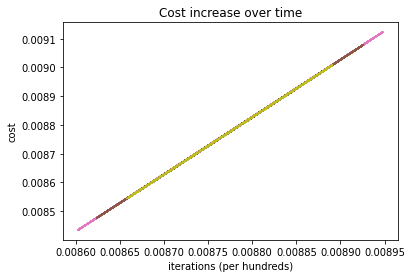

In [ ]:
x = costs[1]
y = costs[2]
plt.plot(x,y)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost increase over time')
plt.show()

### Applying logistic regression using the library

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
y_tr_arr.shape

(79, 1)

In [ ]:
clf.fit(X_tr_arr, y_tr_arr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print (clf.intercept_, clf.coef_)

[-0.25074369] [[-1.00331342  0.82914985 -1.41778357 -1.44570702]]


In [ ]:
pred = clf.predict(X_ts_arr)

In [ ]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr.T)))

Accuracy from sk-learn: 1.0


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_ts_arr.T, y_ts_pred.T)

array([[ 8,  0],
       [ 0, 12]])

In [ ]:
confusion_matrix(y_tr_arr, y_tr_pred.T)

array([[42,  0],
       [ 0, 37]])